In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D, MaxPooling1D

In [2]:
# load data

akbank_data = pd.read_csv("C:\\Users\\ERALP\\OneDrive\\Desktop\\Software Engineering\\SWE599---Financial-Time-Series-Volatility-and-Return-Forecasting\\Code\\akbank_data.csv")

akbank_data.head()

,Date,Hour,Open,High,Low,Close
0,12/2/2019,9:00:00,6.57,6.57,6.57,6.57
1,12/2/2019,10:00:00,6.57,6.59,6.51,6.52
2,12/2/2019,11:00:00,6.52,6.58,6.51,6.57
3,12/2/2019,12:00:00,6.57,6.57,6.46,6.48
4,12/2/2019,13:00:00,6.49,6.49,6.49,6.49


In [5]:
# Concatane the date and time columns and convert it to datetime format

akbank_data['Datetime'] = pd.to_datetime(akbank_data['Date'] + " " + akbank_data['Hour'])

#Dropping Date and Hour columns
akbank_data.set_index('Datetime', inplace=True)
akbank_data.drop(['Date', 'Hour'], axis=1, inplace=True)

akbank_data.head()

,Open,High,Low,Close
Datetime,,,,
2019-12-02 09:00:00,6.57,6.57,6.57,6.57
2019-12-02 10:00:00,6.57,6.59,6.51,6.52
2019-12-02 11:00:00,6.52,6.58,6.51,6.57
2019-12-02 12:00:00,6.57,6.57,6.46,6.48
2019-12-02 13:00:00,6.49,6.49,6.49,6.49


In [6]:
# Preprocessing the data

close_price = akbank_data['Close'].values.reshape(-1,1)

# Normalization

scaler = MinMaxScaler(feature_range=(0, 1))
close_price = scaler.fit_transform(close_price)



In [7]:
# Preparing the data for CNN
# 9 trading hours. 5 days. 45 data points for each week.
# 1 month traing data = 4 weeks = 180 data points
X = []
Y = []

for i in range(180, len(close_price)):
    X.append(close_price[i-180:i, 0])
    Y.append(close_price[i, 0])

X,Y = np.array(X), np.array(Y)

In [8]:
# Reshaping the data for CNN

X = np.reshape(X, (X.shape[0], X.shape[1], 1))



In [9]:
# Creating the CNN model

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=5, activation='relu', input_shape=(X.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [10]:
# Training the model

model.fit(X, Y, epochs=50, batch_size=32)

Epoch 1/50
307/307 [==============================] - 4s 9ms/step - loss: 0.0019
Epoch 2/50
307/307 [==============================] - 3s 10ms/step - loss: 7.1780e-04
Epoch 3/50
307/307 [==============================] - 3s 8ms/step - loss: 5.6624e-04
Epoch 4/50
307/307 [==============================] - 2s 8ms/step - loss: 5.0986e-04
Epoch 5/50
307/307 [==============================] - 2s 8ms/step - loss: 4.0966e-04
Epoch 6/50
307/307 [==============================] - 2s 8ms/step - loss: 4.5300e-04
Epoch 7/50
307/307 [==============================] - 2s 8ms/step - loss: 4.2605e-04
Epoch 8/50
307/307 [==============================] - 2s 8ms/step - loss: 3.1641e-04
Epoch 9/50
307/307 [==============================] - 2s 8ms/step - loss: 3.0811e-04
Epoch 10/50
307/307 [==============================] - 2s 8ms/step - loss: 3.4125e-04
Epoch 11/50
307/307 [==============================] - 2s 8ms/step - loss: 3.0175e-04
Epoch 12/50
307/307 [==============================] - 2s 8ms/step

In [11]:
# Predicting the close price for the last 180 data points

X_test = close_price[len(close_price)-180:]
X_test = np.reshape(X_test, (1, X_test.shape[0], 1))
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)



1/1 [==============================] - 0s 152ms/step
[[16.160202]]


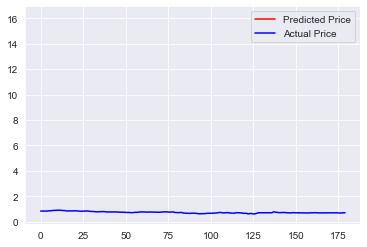

In [12]:
# plot the predicted price and the actual price

import matplotlib.pyplot as plt2

plt2.plot(predicted_price, color='red', label='Predicted Price')
plt2.plot(close_price[len(close_price)-180:], color='blue', label='Actual Price')
plt2.legend()
plt2.show()
